## Interprétation et comparaion de valeurs foncières entre 2018 et 2021 (Post covid)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df_2021=pd.read_csv('https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20220408-143516/valeursfoncieres-2021.txt', sep="|", low_memory=False, decimal=",")
df_2018=pd.read_csv('https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20220408-142623/valeursfoncieres-2018.txt', sep="|", low_memory=False, decimal=",")

In [20]:
df_2021
#df_2018


,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2021,Vente,...,NaN,0,1.0,Maison,NaN,97.0,5.0,S,NaN,2410.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2021,Vente,...,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,2410.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2021,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,530.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2021,Vente,...,NaN,0,1.0,Maison,NaN,88.0,4.0,S,NaN,866.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2021,Vente,...,NaN,0,1.0,Maison,NaN,168.0,5.0,S,NaN,1426.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12/03/2021,Vente,...,NaN,2,2.0,Appartement,NaN,30.0,2.0,NaN,NaN,NaN
3379228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17/03/2021,Vente,...,NaN,2,2.0,Appartement,NaN,37.0,2.0,NaN,NaN,NaN
3379229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/03/2021,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
3379230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/03/2021,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN


## Nettoyage données

In [21]:
#Suppression des duplicats
df_2018 = df_2018.drop_duplicates()
df_2021 = df_2021.drop_duplicates()

df_2018.dropna(how='all', inplace=True, axis=1)
df_2021.dropna(how='all', inplace=True, axis=1)

#Suppression des colonnes inutiles
df_2018 = df_2018.drop(['Nature culture speciale', 'Prefixe de section','B/T/Q',"No Volume","No voie","Type de voie", 'Surface Carrez du 1er lot','Surface Carrez du 2eme lot','Surface Carrez du 3eme lot','Surface Carrez du 4eme lot','Surface Carrez du 5eme lot','1er lot', '2eme lot', '3eme lot','4eme lot','5eme lot', 'Nombre de lots'], axis=1)
df_2021 = df_2021.drop(['Nature culture speciale', 'Prefixe de section','B/T/Q',"No Volume","No voie","Type de voie", 'Surface Carrez du 1er lot','Surface Carrez du 2eme lot','Surface Carrez du 3eme lot','Surface Carrez du 4eme lot','Surface Carrez du 5eme lot','1er lot', '2eme lot', '3eme lot','4eme lot','5eme lot', 'Nombre de lots'], axis=1)

<ipython-input-21-edd22183fbd6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.dropna(how='all', inplace=True, axis=1)


In [22]:
#Suppression des données inutiles

df_2018.drop(df_2018[df_2018['Surface reelle bati'] == 0].index, inplace = True)
df_2021.drop(df_2021[df_2021['Surface reelle bati'] == 0].index, inplace = True)
df_2021 = df_2021.dropna(subset=['Surface reelle bati'])
df_2018 = df_2018.dropna(subset=['Surface reelle bati'])

# Création de la colonne prix m²
df_2018['prix m2'] = df_2018['Valeur fonciere']/df_2018['Surface reelle bati']
df_2021['prix m2'] = df_2021['Valeur fonciere']/df_2021['Surface reelle bati']
# Supresssion valeurs aberrantes >20000€ le m²

df_2018.drop(df_2018[(df_2018['prix m2']>=20000)].index, inplace = True)
df_2018 = df_2018.reset_index(drop=True)
df_2021.drop(df_2021[(df_2021['prix m2']>=20000)].index, inplace = True)
df_2021 = df_2021.reset_index(drop=True)

df_2018

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,prix m2
0,1,03/01/2018,Vente,109000.0,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,01,53,AN,73,2.0,Appartement,73.0,4.0,NaN,NaN,1493.150685
1,1,04/01/2018,Vente,239300.0,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,01,95,AH,186,1.0,Maison,51.0,2.0,AG,420.0,4692.156863
2,1,04/01/2018,Vente,239300.0,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,01,95,AH,186,1.0,Maison,163.0,4.0,S,949.0,1468.098160
3,1,04/01/2018,Vente,239300.0,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,01,95,AH,186,1.0,Maison,51.0,2.0,S,949.0,4692.156863
4,1,04/01/2018,Vente,239300.0,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,01,95,AH,186,1.0,Maison,163.0,4.0,AG,420.0,1468.098160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247070,1,28/12/2018,Vente,1192307.0,2012,CHOISEUL,75002.0,PARIS 02,75,102,AD,118,2.0,Appartement,150.0,4.0,NaN,NaN,7948.713333
1247071,1,03/12/2018,Vente,383000.0,7561,POISSONNIERE,75002.0,PARIS 02,75,102,AO,85,2.0,Appartement,34.0,1.0,NaN,NaN,11264.705882
1247072,1,28/12/2018,Vente,746000.0,8548,STE CROIX BRETONNERIE,75004.0,PARIS 04,75,104,AH,53,4.0,Local industriel. commercial ou assimilé,60.0,0.0,NaN,NaN,12433.333333
1247073,1,13/12/2018,Adjudication,645000.0,6559,MORLAND,75004.0,PARIS 04,75,104,AS,74,2.0,Appartement,54.0,2.0,NaN,NaN,11944.444444


## Analyse et comparaison (Angers et Paris)

In [23]:
Paris18 = df_2018[df_2018['Code departement'] == '75']
Angers18 = df_2018[df_2018['Code departement'] == '49']
Paris21 = df_2021[df_2021['Code departement'] == '75']
Angers21 = df_2021[df_2021['Code departement'] == '49']

In [24]:
mean =Paris18["prix m2"].mean()
print("Prix moyen au m² à Paris en 2018 :")
print(mean)
mean1 =Paris21["prix m2"].mean()
print("Prix moyen au m² à Paris en 2021 :")
print(mean1)
mean2 =Angers18["prix m2"].mean()
print("Prix moyen au m² à Anger en 2018 :")
print(mean2)
mean3 =Angers21["prix m2"].mean()
print("Prix moyen au m² à Anger en 2021 :")
print(mean3)

Prix moyen au m² à Paris en 2018 :
9246.519886784585
Prix moyen au m² à Paris en 2021 :
10262.261992729727
Prix moyen au m² à Anger en 2018 :
2100.5581821113883
Prix moyen au m² à Anger en 2021 :
2556.533544265447


In [25]:
correlation = df_2021.corr(method= "pearson", min_periods = 2)
correlation

,No disposition,Valeur fonciere,Code postal,Code commune,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,prix m2
No disposition,1.000000,0.003497,-0.034733,-0.017937,-0.009893,0.016672,-0.001324,-0.008964,0.017685,-0.027923
Valeur fonciere,0.003497,1.000000,0.037743,-0.020313,-0.013565,0.078621,0.254254,0.015086,0.094310,0.195088
Code postal,-0.034733,0.037743,1.000000,-0.017258,-0.015871,0.051438,-0.003361,-0.017653,-0.008782,0.166918
Code commune,-0.017937,-0.020313,-0.017258,1.000000,0.012796,-0.063105,0.007931,0.067913,-0.006549,-0.114640
No plan,-0.009893,-0.013565,-0.015871,0.012796,1.000000,-0.055800,0.002821,0.042342,-0.019450,-0.080322
Code type local,0.016672,0.078621,0.051438,-0.063105,-0.055800,1.000000,0.111604,-0.663092,0.076015,0.181082
Surface reelle bati,-0.001324,0.254254,-0.003361,0.007931,0.002821,0.111604,1.000000,-0.039652,0.155822,-0.051832
Nombre pieces principales,-0.008964,0.015086,-0.017653,0.067913,0.042342,-0.663092,-0.039652,1.000000,-0.025716,-0.210217
Surface terrain,0.017685,0.094310,-0.008782,-0.006549,-0.019450,0.076015,0.155822,-0.025716,1.000000,0.007693
prix m2,-0.027923,0.195088,0.166918,-0.114640,-0.080322,0.181082,-0.051832,-0.210217,0.007693,1.000000


In [26]:
correlation1 = df_2018.corr(method= "pearson", min_periods = 2)
correlation1

,No disposition,Valeur fonciere,Code postal,Code commune,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,prix m2
No disposition,1.000000,0.002220,-0.006715,0.002261,0.039874,0.007102,0.013285,-0.007153,0.016260,-0.017079
Valeur fonciere,0.002220,1.000000,0.046305,-0.020490,-0.011765,0.101219,0.224258,-0.003134,0.088693,0.214769
Code postal,-0.006715,0.046305,1.000000,-0.054463,0.008522,0.049001,-0.003821,-0.019684,-0.001526,0.174733
Code commune,0.002261,-0.020490,-0.054463,1.000000,-0.007073,-0.059042,0.006498,0.066624,-0.008407,-0.113356
No plan,0.039874,-0.011765,0.008522,-0.007073,1.000000,-0.054535,0.001197,0.042366,-0.018266,-0.068122
Code type local,0.007102,0.101219,0.049001,-0.059042,-0.054535,1.000000,0.106445,-0.681560,0.077016,0.203200
Surface reelle bati,0.013285,0.224258,-0.003821,0.006498,0.001197,0.106445,1.000000,-0.041954,0.112441,-0.048350
Nombre pieces principales,-0.007153,-0.003134,-0.019684,0.066624,0.042366,-0.681560,-0.041954,1.000000,-0.034758,-0.226671
Surface terrain,0.016260,0.088693,-0.001526,-0.008407,-0.018266,0.077016,0.112441,-0.034758,1.000000,0.013074
prix m2,-0.017079,0.214769,0.174733,-0.113356,-0.068122,0.203200,-0.048350,-0.226671,0.013074,1.000000


<AxesSubplot:>

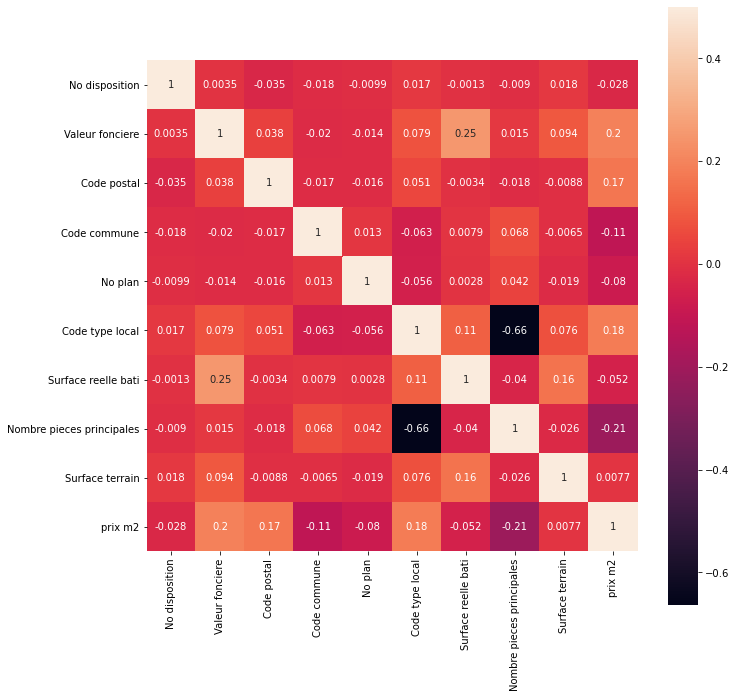

In [27]:
import seaborn as sns
plt.subplots(figsize=(11,11))
sns.heatmap(correlation, vmax=0.5 , square=True, annot=True, )

<AxesSubplot:>

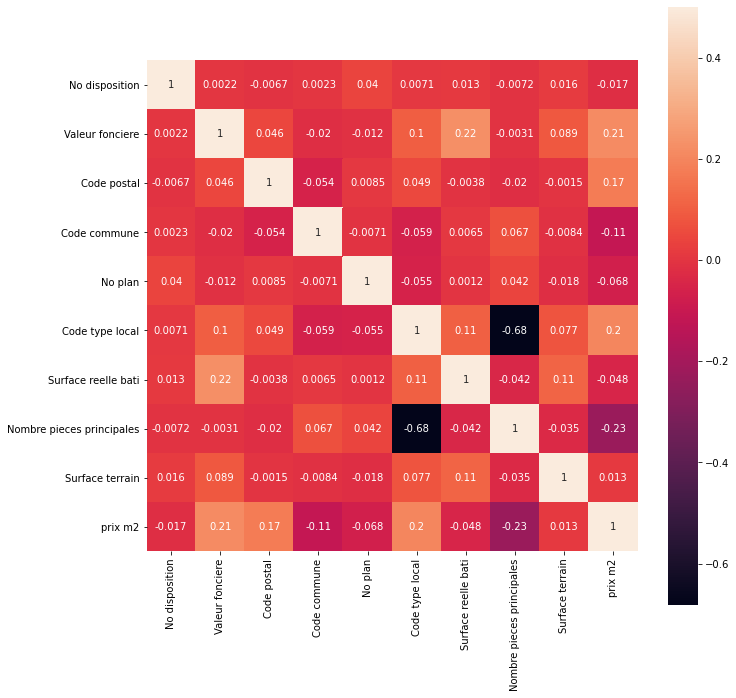

In [28]:
plt.subplots(figsize=(11,11))
sns.heatmap(correlation1, vmax=0.5 , square=True, annot=True, )

## Visualisation des données

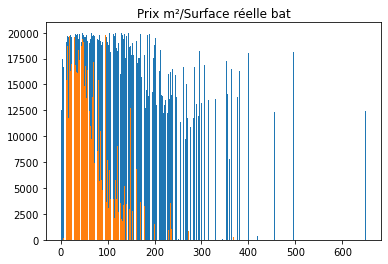

In [49]:
# on s'intéresse aux appartements en 2021 et 2018

df_typeLocal_2= Paris21[Paris21["Type local"]=="Local industriel. commercial ou assimilé"].index
df_typeLocal2= Paris21.drop(df_typeLocal_2)
df_typeLocal_2= df_typeLocal2[df_typeLocal2["Type local"]=="Maison"].index
Appartement_Paris_21 = df_typeLocal2.drop(df_typeLocal_2)

df_typeLocal_1= Angers21[Angers21["Type local"]=="Local industriel. commercial ou assimilé"].index
df_typeLocal1= Angers21.drop(df_typeLocal_1)
df_typeLocal_1= df_typeLocal1[df_typeLocal1["Type local"]=="Maison"].index
Appartement_Angers_21 = df_typeLocal1.drop(df_typeLocal_1)



y = Appartement_Paris_21["prix m2"]
x = Appartement_Paris_21["Surface reelle bati"]
y2 = Appartement_Angers_21["prix m2"]
x2 = Appartement_Angers_21["Surface reelle bati"]
plt.bar(x, y)
plt.bar(x2, y2)
plt.title("Prix m²/Surface réelle bat")
plt.show()


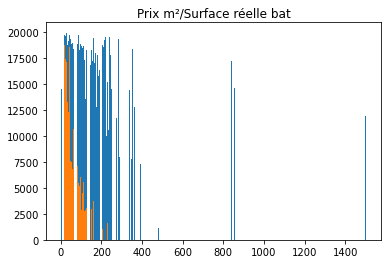

In [30]:
df_typeLocal_2= Paris18[Paris18["Type local"]=="Local industriel. commercial ou assimilé"].index
df_typeLocal2= Paris18.drop(df_typeLocal_2)
df_typeLocal_2= df_typeLocal2[df_typeLocal2["Type local"]=="Maison"].index
Appartement_Paris_18 = df_typeLocal2.drop(df_typeLocal_2)

df_typeLocal_1= Angers18[Angers18["Type local"]=="Local industriel. commercial ou assimilé"].index
df_typeLocal1= Angers18.drop(df_typeLocal_1)
df_typeLocal_1= df_typeLocal1[df_typeLocal1["Type local"]=="Maison"].index
Appartement_Angers_18 = df_typeLocal1.drop(df_typeLocal_1)



y = Appartement_Paris_18["prix m2"]
x = Appartement_Paris_18["Surface reelle bati"]
y2 = Appartement_Angers_18["prix m2"]
x2 = Appartement_Angers_18["Surface reelle bati"]
plt.bar(x, y)
plt.bar(x2, y2)
plt.title("Prix m²/Surface réelle bat")
plt.show()


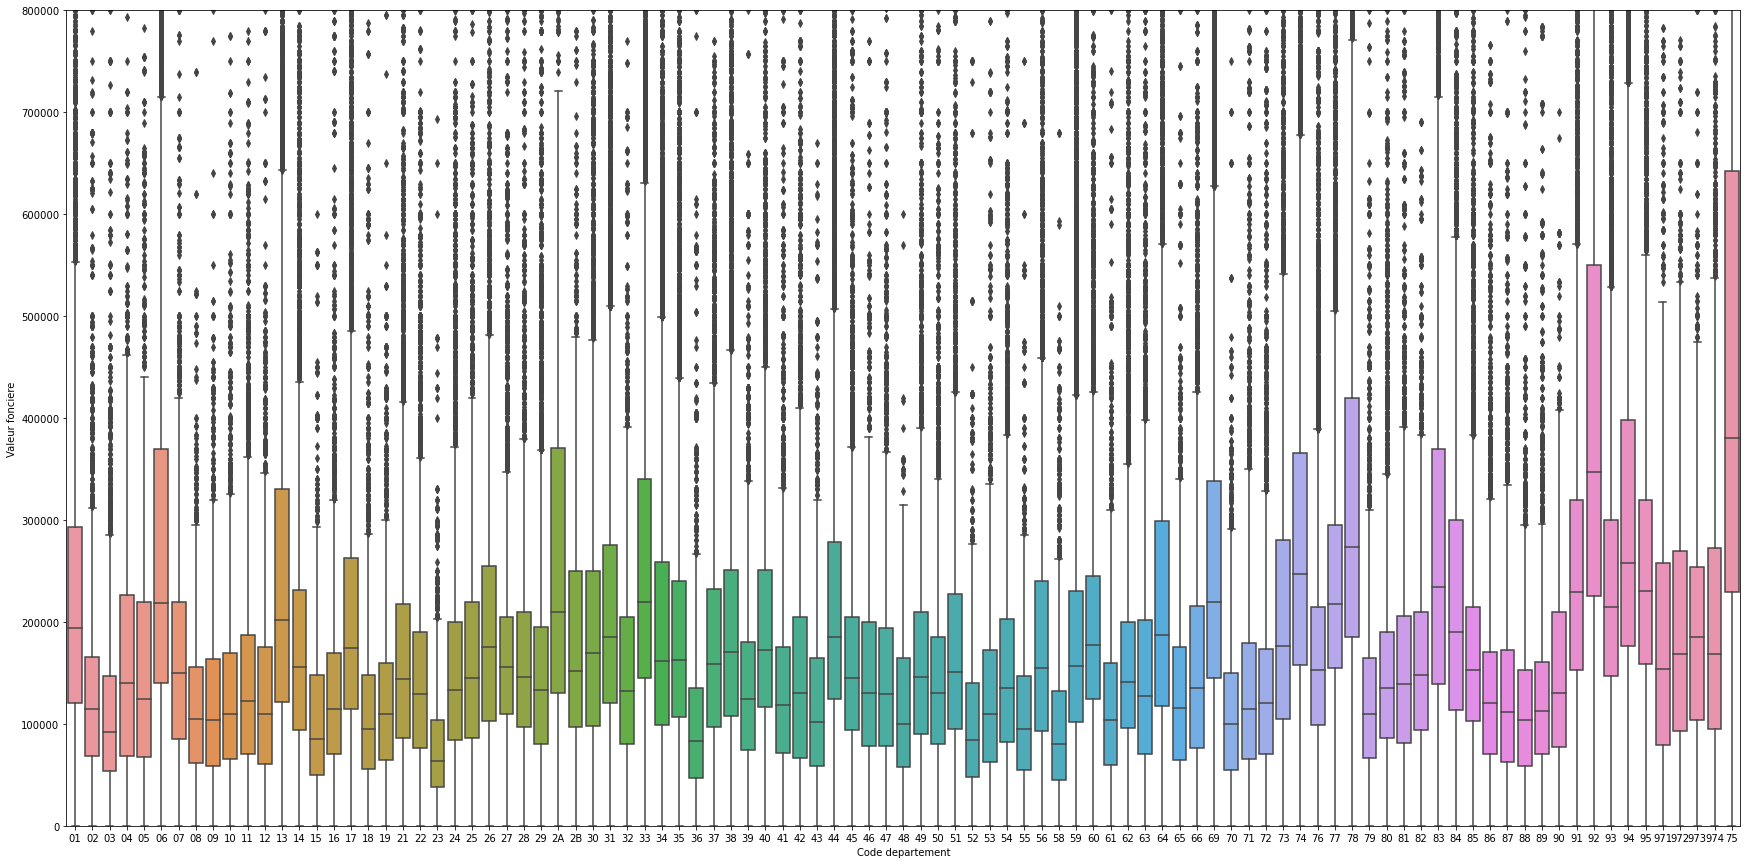

In [31]:
# Regardons les prix en fonctions des départements
Axes = pd.concat([df_2018['Valeur fonciere'], df_2018['Code departement']], axis=1)
f, ax = plt.subplots(figsize=(30, 15))
fig = sns.boxplot(x=df_2018['Code departement'], y=df_2018['Valeur fonciere'], data= Axes)
fig.axis(ymin=0, ymax=800000);

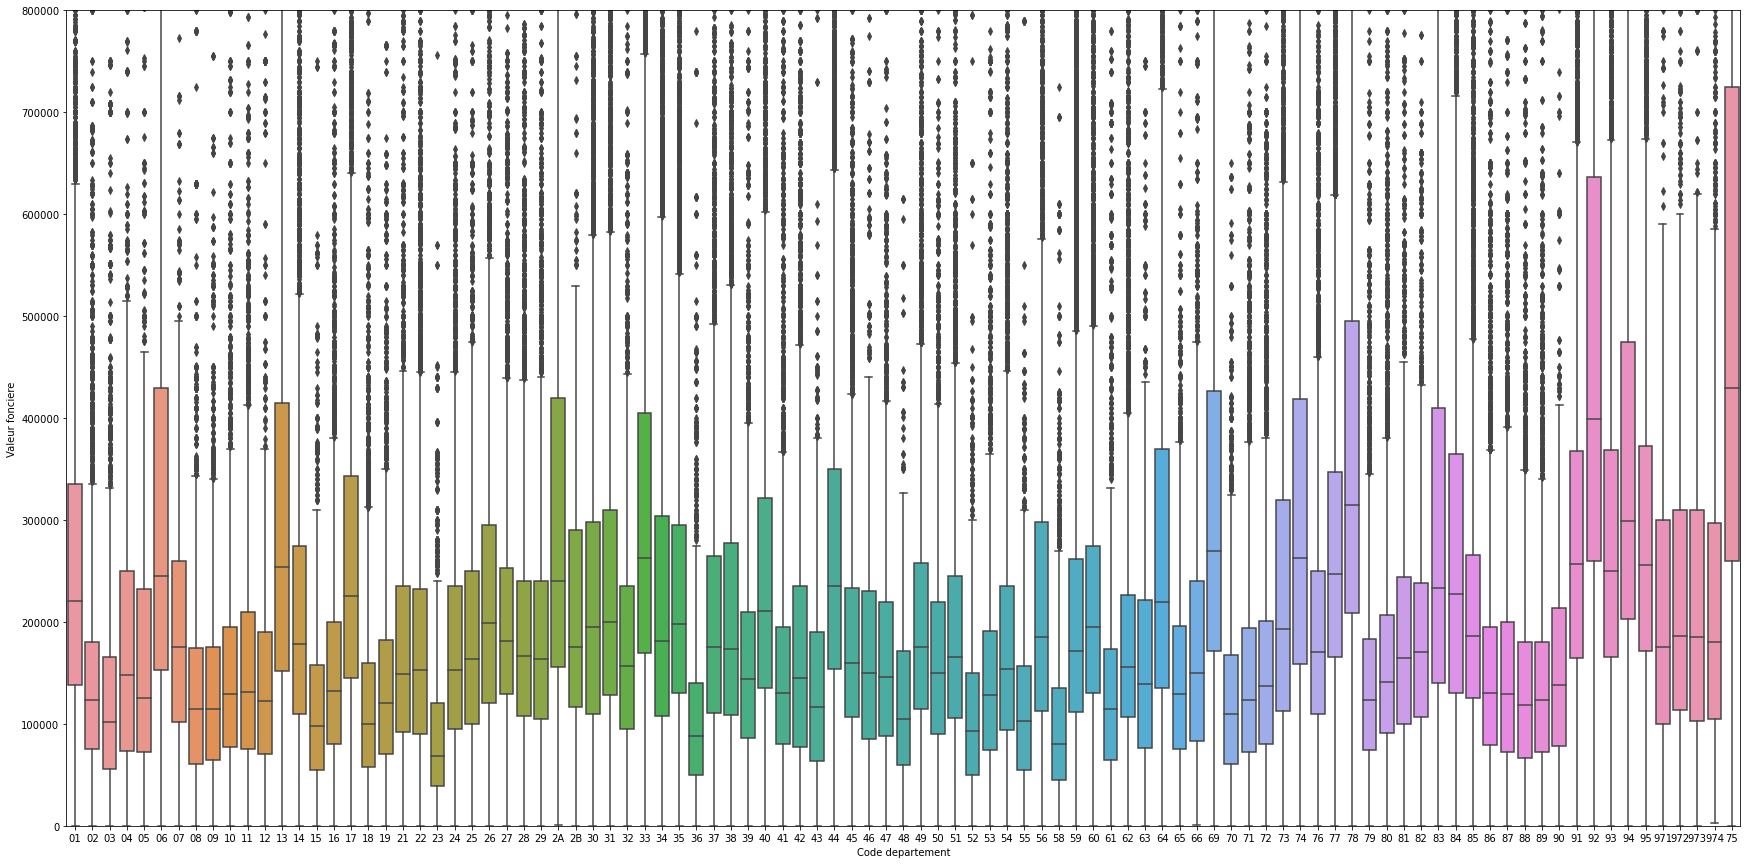

In [32]:
Axes = pd.concat([df_2021['Valeur fonciere'], df_2021['Code departement']], axis=1)
f, ax = plt.subplots(figsize=(30, 15))
fig = sns.boxplot(x=df_2021['Code departement'], y=df_2021['Valeur fonciere'], data= Axes)
fig.axis(ymin=0, ymax=800000);

## Apprentissage non supervisé

In [33]:
supervise=Appartement_Paris_21[['prix m2',"Surface reelle bati"]]
supervise

,prix m2,Surface reelle bati
1076185,13333.333333,111.0
1076186,13225.806452,31.0
1076188,13043.478261,23.0
1076189,16666.666667,60.0
1076190,16764.384615,91.0
...,...,...
1114100,15333.333333,15.0
1114101,15384.615385,26.0
1114102,16000.000000,25.0
1114103,12766.666667,30.0


In [34]:
supervise = supervise.reset_index(drop=True)
supervise
supervise = supervise.dropna(subset=['prix m2'])
print(supervise.isnull().sum())

prix m2                0
Surface reelle bati    0
dtype: int64


In [35]:
from sklearn.cluster import KMeans
supervise = supervise.dropna(subset=['prix m2'])
model = KMeans(n_clusters=3)
model.fit(supervise)
model.predict(supervise)


array([0, 0, 0, ..., 0, 0, 1])

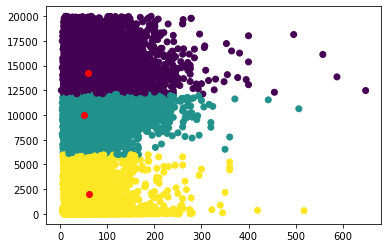

In [36]:
plt.scatter(supervise.iloc[:,1], supervise.iloc[:,0], c=model.predict(supervise))
plt.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,0], c='r')

Text(0, 0.5, 'Cout du model')

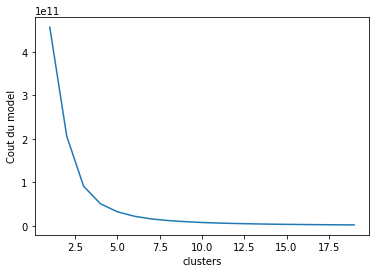

In [37]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model= KMeans(n_clusters=k).fit(supervise)
    inertia.append(model.inertia_)
    
plt.plot(K_range, inertia)
plt.xlabel('clusters')
plt.ylabel('Cout du model')

In [38]:
Pca = Appartement_Paris_21.select_dtypes("float64")
Pca = Pca.reset_index(drop=True)
Pca.isnull().sum()

Valeur fonciere                151
Code postal                      0
Code type local                  0
Surface reelle bati              0
Nombre pieces principales        0
Surface terrain              34090
prix m2                        151
dtype: int64

In [39]:
Pca = Pca.dropna(subset=['Valeur fonciere'])
Pca = Pca.dropna(subset=['Surface terrain'])
Pca = Pca.dropna(subset=['prix m2'])

In [40]:
Pca.isnull().sum()

Valeur fonciere              0
Code postal                  0
Code type local              0
Surface reelle bati          0
Nombre pieces principales    0
Surface terrain              0
prix m2                      0
dtype: int64

Text(0.5, 1.0, 'PCA')

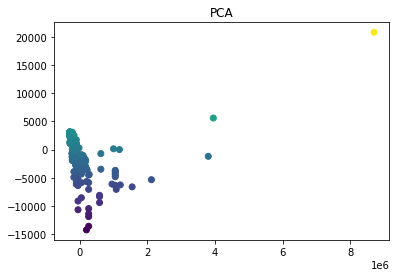

In [41]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
Appartement_pca = model.fit_transform(Pca)
plt.scatter(Appartement_pca[:,0], Appartement_pca[:,1], c=Appartement_pca[:,1])
plt.title("PCA")

## Apprentissage supervisé

In [42]:
Appartement_Paris_21["arrondi du prix m2"]= Appartement_Paris_21["prix m2"]
Appartement_Paris_21= Appartement_Paris_21.drop(["prix m2"], axis = 1)

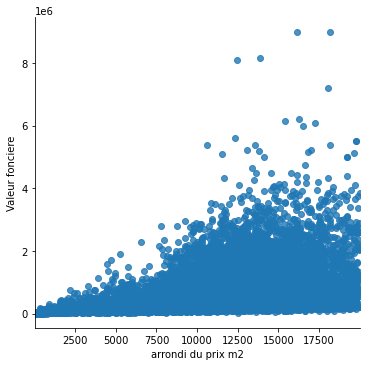

In [43]:
Appartement_Paris_21

sns.lmplot(x ="arrondi du prix m2", y = "Valeur fonciere", data = Appartement_Paris_21, order = 2, ci = None) 

In [44]:
Appartement_Paris_21.fillna(method ='ffill', inplace = True) 
Appartement_Paris_21

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,arrondi du prix m2
1076185,1,05/01/2021,Vente,1480000.0,0960,DE LA BIENFAISANCE,75008.0,PARIS 08,75,108,BX,73,2.0,Appartement,111.0,5.0,NaN,NaN,13333.333333
1076186,1,08/01/2021,Vente,410000.0,8525,SAINT-DENIS,75001.0,PARIS 01,75,101,AQ,91,2.0,Appartement,31.0,2.0,NaN,NaN,13225.806452
1076188,1,07/01/2021,Vente,300000.0,9382,DES TOURNELLES,75003.0,PARIS 03,75,103,AN,86,2.0,Appartement,23.0,1.0,NaN,NaN,13043.478261
1076189,1,06/01/2021,Vente,1000000.0,7061,DU PARC ROYAL,75003.0,PARIS 03,75,103,AM,105,2.0,Appartement,60.0,2.0,NaN,NaN,16666.666667
1076190,1,08/01/2021,Vente,1525559.0,4897,JEAN GOUJON,75008.0,PARIS 08,75,108,AK,12,2.0,Appartement,91.0,4.0,NaN,NaN,16764.384615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114100,1,29/03/2021,Vente,230000.0,0040,D ABOUKIR,75002.0,PARIS 02,75,102,AO,165,2.0,Appartement,15.0,1.0,S,516.0,15333.333333
1114101,1,04/03/2021,Vente,400000.0,4831,DE JARENTE,75004.0,PARIS 04,75,104,AN,41,2.0,Appartement,26.0,1.0,S,516.0,15384.615385
1114102,1,04/03/2021,Vente,400000.0,4831,DE JARENTE,75004.0,PARIS 04,75,104,AN,41,2.0,Appartement,25.0,1.0,S,516.0,16000.000000
1114103,1,12/03/2021,Vente,383000.0,9382,DES TOURNELLES,75004.0,PARIS 04,75,104,AO,117,2.0,Appartement,30.0,2.0,S,516.0,12766.666667


In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.array(Appartement_Paris_21['arrondi du prix m2']).reshape(-1, 1) 
y = np.array(Appartement_Paris_21['Valeur fonciere']).reshape(-1, 1)   
Appartement_Paris_21.dropna(inplace = True) 
# On s'épare notre jeu de donnée à 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [46]:
model = LinearRegression() 
model.fit(X_train, y_train) 
model.score(X_test, y_test) 

0.19897075951783771

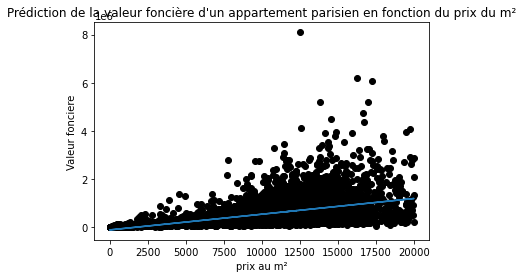

In [47]:
y_pred = model.predict(X_test) 
plt.title("Prédiction de la valeur foncière d'un appartement parisien en fonction du prix du m²")
plt.xlabel("prix au m²")
plt.ylabel("Valeur fonciere")

plt.scatter(X_test, y_test, color ='black') 
plt.plot(X_test, y_pred)  
plt.show() 